# Create cropped dataset of TROPOMI data that focuses on California

In [1]:
#IMPORT PACKAGES
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob

In [2]:
#MAKE A LIST OF FILES TO LOOP THROUGH AND LIST THEM
files = glob.glob('/scratch/averstyn/S5P/co/oct2022/S5P*.nc')

In [3]:
# OPEN FILE OF SPECIFIC DAY AND SWATCH OF SATELLITE DATA AND CREATE XARRAY DATASET
file = files[38]
ds = xr.open_dataset(file,group='PRODUCT')

In [4]:
#SELECT SMALL REGION THAT CONTAINS CALIFORNIA
subset = ds.sel(scanline=slice(2900,3400))
subset2 = subset.sel(ground_pixel=slice(0,300))

In [11]:
#CREATE CARBON MONOXIDE DATA ARRAYS
lats = subset2['latitude'][0,:,:]
lons = subset2['longitude'][0,:,:]
co = subset2['carbonmonoxide_total_column'][0,:,:]
co = co*10000 #MULTIPLY BY 10000 TO NORMALIZE SCALE

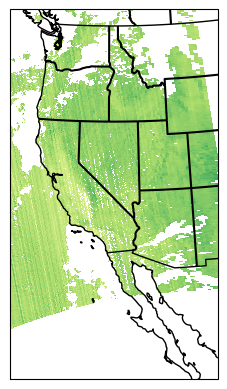

In [12]:
#PLOT QUICK IMAGE OF DATA TO ENSURE CORRECT AREA IS SELECTED
extent = [-125,-108,23,50]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon,central_lat))
trans = ccrs.PlateCarree()
ax.coastlines(zorder=100)
states = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',
                             facecolor='none')
cs = ax.pcolormesh(lons,lats,co,vmin=0,vmax=800.0,transform=trans,cmap='RdYlGn_r')
ax.set_extent(extent)
ax.add_feature(states,zorder=3,linewidth=1.5,edgecolor='black')
ax.add_feature(cfeature.BORDERS)

In [13]:
#DROP TIME FROM DATASET BECAUSE HAS NAN VALUES AND NOT RELEVANT TO DATASET
subset3 = subset2.drop_vars('time_utc')

##### WRITE NEW CROPPED DATASET TO NEW NETCDF FILE (FILE NAME: YYYYMMDD"T"HHMMSS.NC)

In [14]:
#WRITE NEW CROPPED DATASET TO NEW NETCDF FILE (FILE NAME: YYYYMMDD"T"HHMMSS.NC)
#subset3.to_netcdf('/scratch/averstyn/S5P/co/oct2022_cropped/'+str(file[53:68])+'_cropped.nc')